In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame
df = pd.read_csv('movie_metadata.csv')
df = df.drop(columns=["color", "director_name", "num_critic_for_reviews", "director_facebook_likes", "actor_3_facebook_likes", "actor_2_name", "actor_1_facebook_likes", "actor_1_name", "cast_total_facebook_likes", "actor_3_name", "facenumber_in_poster", "plot_keywords", "movie_imdb_link", "language", "country", "actor_2_facebook_likes", "movie_facebook_likes"])
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,duration,gross,genres,movie_title,num_voted_users,num_user_for_reviews,content_rating,budget,title_year,imdb_score,aspect_ratio
0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,3054.0,PG-13,237000000.0,2009.0,7.9,1.78
1,169.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,471220,1238.0,PG-13,300000000.0,2007.0,7.1,2.35
2,148.0,200074175.0,Action|Adventure|Thriller,Spectre,275868,994.0,PG-13,245000000.0,2015.0,6.8,2.35
3,164.0,448130642.0,Action|Thriller,The Dark Knight Rises,1144337,2701.0,PG-13,250000000.0,2012.0,8.5,2.35
5,132.0,73058679.0,Action|Adventure|Sci-Fi,John Carter,212204,738.0,PG-13,263700000.0,2012.0,6.6,2.35


In [3]:
X = df["num_voted_users"].values.reshape(-1, 1)
y = df["gross"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (3784, 1) (3784, 1)


Text(0, 0.5, 'Box Office')

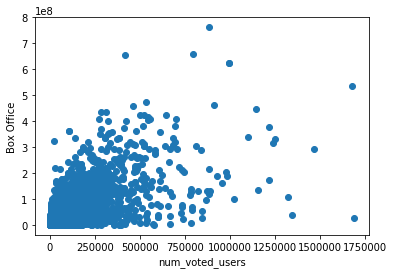

In [4]:
plt.scatter(X, y)
plt.xlabel("num_voted_users")
plt.ylabel("Box Office")

In [5]:
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
# Create the model


from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [7]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score


# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 3679223019148642.0
R-squared (R2 ): 0.4285103978817205


In [9]:
# Call the `score` method on the model to show the r2 score
model.score(X_test, y_test)

0.4285103978817206